In [ ]:
pip install split_folders

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-04-17 16:00:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.7MB/s    in 37s     

2021-04-17 16:00:49 (8.22 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt',
 'train',
 'scissors',
 'rock',
 'paper',
 'val',
 'rps-cv-images']

In [ ]:
import splitfolders
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(base_dir, output = "/tmp/rockpaperscissors", seed = 1337, ratio = (.6, .4))

train_dir = os.path.join("/tmp/rockpaperscissors", "train")
validation_dir = os.path.join("/tmp/rockpaperscissors", "val")

Copying files: 2188 files [00:02, 1093.02 files/s]


In [ ]:
rock_dir = os.path.join (base_dir, 'rock')
paper_dir = os.path.join (base_dir, 'paper')
scissors_dir = os.path.join (base_dir, 'scissors')

In [ ]:
#memecah direktori rock,paper,scissors menjadi data train dan validasi data
train_rock_dir, val_rock_dir = train_test_split (os.listdir (rock_dir), test_size =0.4, train_size =0.6)
train_paper_dir, val_paper_dir = train_test_split (os.listdir (paper_dir), test_size =0.4, train_size =0.6)
train_scissors_dir, val_scissors_dir = train_test_split (os.listdir (scissors_dir), test_size =0.4, train_size =0.6)

In [ ]:
train_rock = os.path.join (train_dir, 'rock')
train_paper = os.path.join (train_dir, 'paper')
train_scissors = os.path.join (train_dir, 'scissors')
val_rock = os.path.join (validation_dir, 'rock')
val_paper = os.path.join (validation_dir, 'paper')
val_scissors = os.path.join (validation_dir, 'scissors')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      )

Epoch 1/20
25/25 [==============================] - 50s 2s/step - loss: 1.1353 - accuracy: 0.3868 - val_loss: 0.9415 - val_accuracy: 0.4500
Epoch 2/20
25/25 [==============================] - 43s 2s/step - loss: 0.8337 - accuracy: 0.6350 - val_loss: 0.5206 - val_accuracy: 0.8000
Epoch 3/20
25/25 [==============================] - 43s 2s/step - loss: 0.3843 - accuracy: 0.8632 - val_loss: 0.5330 - val_accuracy: 0.8938
Epoch 4/20
25/25 [==============================] - 43s 2s/step - loss: 0.3199 - accuracy: 0.8843 - val_loss: 0.3054 - val_accuracy: 0.9000
Epoch 5/20
25/25 [==============================] - 43s 2s/step - loss: 0.2061 - accuracy: 0.9287 - val_loss: 0.3967 - val_accuracy: 0.8313
Epoch 6/20
25/25 [==============================] - 43s 2s/step - loss: 0.2736 - accuracy: 0.8864 - val_loss: 0.2811 - val_accuracy: 0.8813
Epoch 7/20
25/25 [==============================] - 43s 2s/step - loss: 0.1609 - accuracy: 0.9566 - val_loss: 0.2102 - val_accuracy: 0.9312
Epoch 8/20
25/25 [==

Saving batu.png to batu.png
batu.png
rock


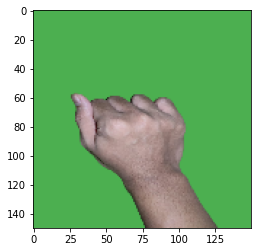

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
if classes[0][0]==1:
	print('paper')
elif classes[0][1]==1:
	print('rock')
elif classes [0][2]==1:
	print('scissors')